In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train = pd.read_csv("seoulBike/train.csv")

print(train.shape)
train.head()

(1000, 11)


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [7]:
test = pd.read_csv("seoulBike/test.csv")

print(test.shape)
test.head()

(327, 10)


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,1655,4,14.6,0.0,0.6,49.0,2000.0,0.014,41.0,27.0
1,1657,20,21.8,0.0,4.4,40.0,2000.0,0.048,35.0,19.0
2,1660,22,18.3,0.0,1.0,37.0,970.0,0.032,169.0,38.0
3,1662,7,13.2,0.0,0.6,85.0,431.0,0.023,50.0,39.0
4,1663,8,8.9,0.0,0.9,77.0,613.0,0.005,82.0,40.0


### Explore

In [8]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

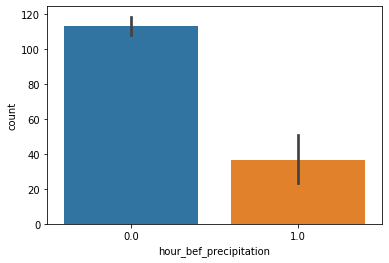

In [11]:
sns.barplot(data = train, x = "hour_bef_precipitation", y = "count")

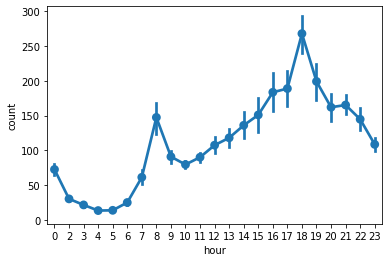

In [13]:
sns.pointplot(data = train, x = "hour",y = "count")

In [30]:
train["hour_bef_temperature(int)"] = train["hour_bef_temperature"].astype("int")
test["hour_bef_temperature(int)"] = test["hour_bef_temperature"].astype("int")

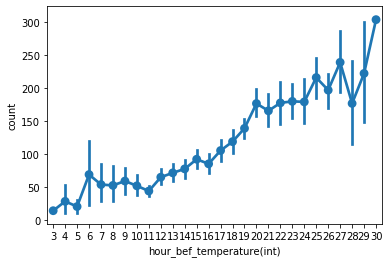

In [31]:
sns.pointplot(data = train, x = "hour_bef_temperature(int)", y = "count")

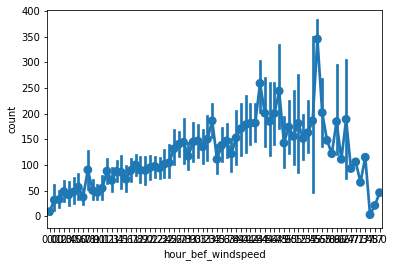

In [32]:
sns.pointplot(data = train, x = "hour_bef_windspeed", y = "count")

In [33]:
train["hour_bef_windspeed(int)"] = train["hour_bef_windspeed"].astype("int")
test["hour_bef_windspeed(int)"] = test["hour_bef_windspeed"].astype("int")

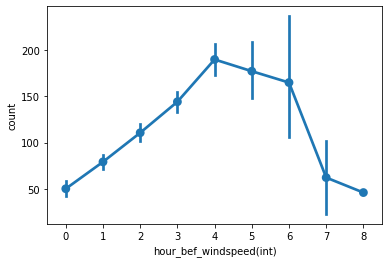

In [34]:
sns.pointplot(data = train, x = "hour_bef_windspeed(int)", y = "count")

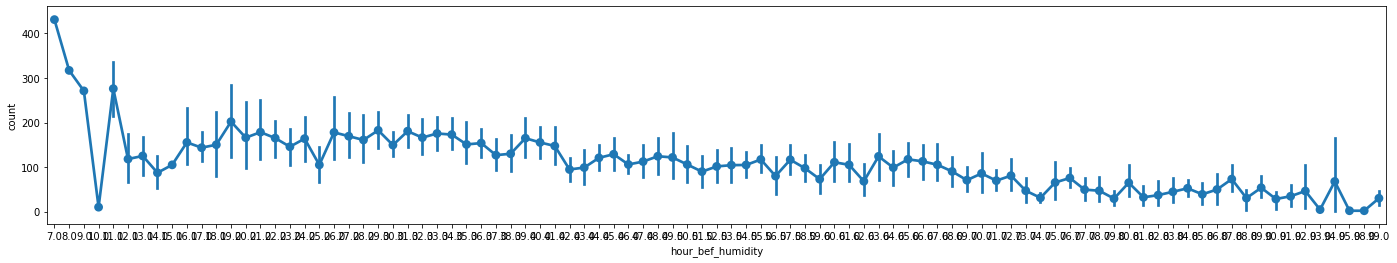

In [35]:
plt.figure(figsize = (24,4))
sns.pointplot(data = train, x = "hour_bef_humidity", y = "count")

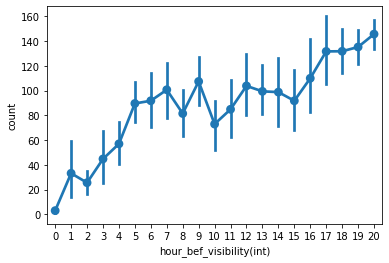

In [39]:
train["hour_bef_visibility(int)"] = (train["hour_bef_visibility"] / 100).astype("int")
test["hour_bef_visibility(int)"] = (test["hour_bef_visibility"] / 100).astype("int")
sns.pointplot(data = train, x  = "hour_bef_visibility(int)", y = "count")

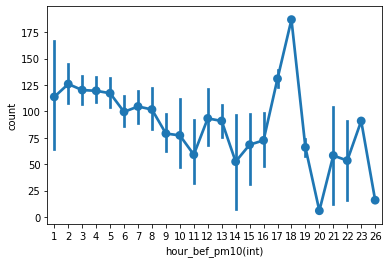

In [43]:
train["hour_bef_pm10(int)"] = (train["hour_bef_pm10"] / 10).astype("int")
test["hour_bef_pm10(int)"] = (test["hour_bef_pm10"] / 10).astype("int")
sns.pointplot(data = train, x = "hour_bef_pm10(int)", y = "count")

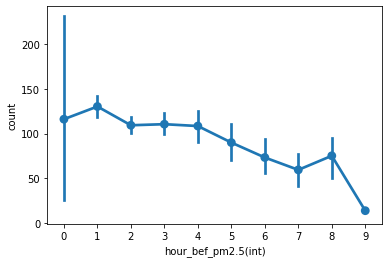

In [44]:
train["hour_bef_pm2.5(int)"] = (train["hour_bef_pm2.5"] / 10).astype("int")
test["hour_bef_pm2.5(int)"] = (test["hour_bef_pm2.5"] / 10).astype("int")
sns.pointplot(data = train, x = "hour_bef_pm2.5(int)", y = "count")

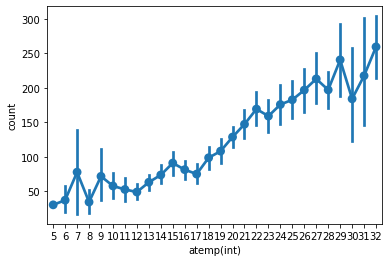

In [48]:
train["atemp"] = 13.12 + train["hour_bef_temperature"] * 0.6215 - 11.37 * np.power(train["hour_bef_windspeed"],0.15) + 0.3965 * np.power(train["hour_bef_windspeed"],0.15) * train["hour_bef_temperature"]
test["atemp"] = 13.12 + test["hour_bef_temperature"] * 0.6215 - 11.37 * np.power(test["hour_bef_windspeed"],0.15) + 0.3965 * np.power(test["hour_bef_windspeed"],0.15) * test["hour_bef_temperature"]
train["atemp(int)"] = train["atemp"].astype("int")
test["atemp(int)"] = test["atemp"].astype("int")
sns.pointplot(data = train, x = "atemp(int)", y = "count")

In [50]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 3000, random_state = 37, n_jobs = -1)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=-1, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

In [51]:
features = ["atemp(int)","hour_bef_pm2.5(int)","hour_bef_pm10(int)","hour_bef_windspeed(int)","hour_bef_temperature(int)","hour"]

In [66]:
x_train = train[features]
y_test = train["count"]
x_test = test[features]

In [67]:
model.fit(x_train, y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=-1, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

In [68]:
test.shape

(327, 17)

In [69]:
submission.shape

(327, 2)

In [70]:
predictions = model.predict(x_test)
predictions.shape

(327,)

In [77]:
submission = pd.read_csv("seoulBike/submission.csv")

In [78]:
submission.shape

(327, 2)

In [79]:
submission["count"] = predictions

In [83]:
submission["id"] = np.arange(327)

In [84]:
submission.to_csv("seoulBike/a.csv", index = False)

In [85]:
submission.head()

,id,count
0,0,15.355867
1,1,238.061667
2,2,127.759000
3,3,33.283333
4,4,141.047333
